# CEWA 568 Snow Hydrology - Spring 2023
## Lab 2-2-short: Plotting data snow pillow, temperature, and precipitation data from Kettle Ponds.

Written by Eli Schwat (elilouis@uw.edu) - March 2023
shortened by Jessica Lundquist - April 2023

---

This lab will introduce you to plotting data from the Sublimation of Snow (SoS) field campaign. (If you also want to learn how to download data, please go to the full version of the lab.) The SoS field site is at Kettle Ponds within the East River valley near Crested Butte, CO. 

First we will download data from an FTP server hosted by the Earth Observing Laboratory at the University Corporation for Atmospheric Research, who assisted with the logistics of the SoS field campaign. We open up the downloaded SoS NetCDF files with the Xarray library.

Then, we will read in a data file (stored locally) with precipitation guage data from an instrument maintained by the NOAA SPLASH campaign. This dataset comes in whitespace-delimited text files (like a csv but with spaces instead of commas). We open up this data with the Pandas library.

Finally, we plot both datasets using Matplotlib.

## Library imports

In [1]:
# import libraries we'll need
import urllib
import pandas as pd
import datetime as dt
import xarray as xr
import matplotlib.pyplot as plt
import os
%matplotlib inline

## User-provided inputs

Here we define a few variables to be used in the notebook. You may or may not want to change these values.

In [2]:
# Provide the path to a directory you want to download the SoS files to
download_directory = './sosnoqc/'

# Provide the paths to the precipitation file. This file was provided to you, you can either
# specify the path below or put the file in the same directory as this notebook.
precipitation_file = 'precipitation.nc'

# Provide a the start and end dates you want to download
start_date = '20221201'
end_date = '20230327'

# Provide the specific variables you want to extract from the dataset.
# We provide these in advance because the datasets are very large and, 
# when we open them, we want to immediately extract only the data we want.
VARIABLES = [
    'SWE_p1_c',
    'SWE_p2_c',
    'SWE_p3_c',
    'SWE_p4_c',
    'T_2m_c',
]

## Load and open SoS Data

In [9]:
sos_dataset_60min=xr.open_dataset("sos_SWE_T_P.nc")

### Note that the code to download SoS NetCDF files from an NCAR FTP server can be found in the original lab 2-2

In [4]:
# Create a list of datetime objects for every day between the provided start_date and end_date. 
datelist = pd.date_range(
    dt.datetime.strptime(start_date, '%Y%m%d'),
    dt.datetime.strptime(end_date, '%Y%m%d'),
    freq='d'
).strftime('%Y%m%d').tolist()


#### Check out our SoS dataset

Note that our `dataset` has just the variables we are defined. Note that, if you used the full data pull, you would get a `example_complete_dataset` with 1047 variables.

In [10]:
sos_dataset_60min

<xarray.Dataset>
Dimensions:   (time: 2808)
Coordinates:
  * time      (time) datetime64[ns] 2022-12-01 ... 2023-03-27T23:00:00
Data variables:
    SWE_p1_c  (time) float32 ...
    SWE_p2_c  (time) float32 ...
    SWE_p3_c  (time) float32 ...
    SWE_p4_c  (time) float32 ...
    T_2m_c    (time) float32 ...

## Open precipitation dataset

In [7]:
precip_dataset = xr.open_dataset(precipitation_file)

### Check out the precipitation dataset

In [8]:
precip_dataset

<xarray.Dataset>
Dimensions:   (date: 132)
Coordinates:
  * date      (date) datetime64[ns] 2022-11-01 2022-11-02 ... 2023-03-12
Data variables:
    acc_prec  (date) float64 ...

## Plot
We use the Matplotlib library because integrates nicely with Xarray and makes creating simple plots quickly an easy task.

The SoS dataset you just imported contains the hourly mean, calculated from the high-rate (5 minute) data, to look at season long changes. Also, the snow pillow dataset has lots of nans so resampling makes the plot look better. The precipitaton dataset is already daily, so we don't need to resample it.

Now we plot the data. Note that SWE_p1_c, SWE_p2_c, SWE_p3_c, SWE_p24_ corresponse to the snow pillows beneath towers UW, UE, C, D, respectively.

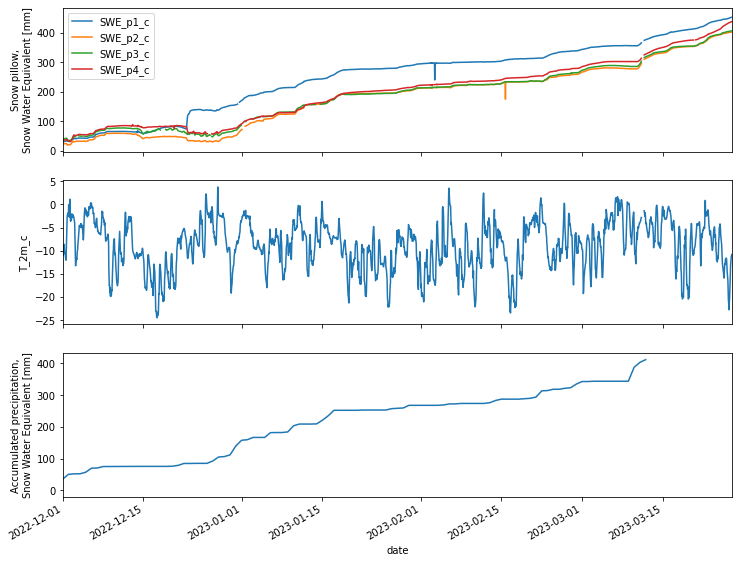

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(12,9), sharex=True)
sos_dataset_60min['SWE_p1_c'].plot(ax=axes[0], label='SWE_p1_c')
sos_dataset_60min['SWE_p2_c'].plot(ax=axes[0], label='SWE_p2_c')
sos_dataset_60min['SWE_p3_c'].plot(ax=axes[0], label='SWE_p3_c')
sos_dataset_60min['SWE_p4_c'].plot(ax=axes[0], label='SWE_p4_c')
sos_dataset_60min['T_2m_c'].plot(ax=axes[1])
precip_dataset['acc_prec'].plot(ax=axes[2])
axes[0].legend()
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[0].set_ylabel("Snow pillow,\nSnow Water Equivalent [mm]")
axes[0].set_xlim(dt.datetime(2022,12,1), dt.datetime(2023,3,27))
plt.show()

Note that to save the datafile, you would use the following code:

sos_dataset_60min.to_netcdf("sos_SWE_T_P.nc")

Then, to load it in again, you would use:
newdataset=xr.open_dataset("sos_SWE_T_P.nc")

This may be helpful in combined datasets for the homework assignment.